In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [205]:
parts_data = pd.read_csv('/Users/skylerwilson/Desktop/Lighthouse_Labs/Projects/final_project/data/Project_Data/cleaned_parts_data.csv')

parts_data = parts_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

parts_data.head(10)

Part Number Category                              Description  \
0              0      PM1                            return spring   
1  0 580 463 999      ACC  euro moto internationalrelectrics bosch   
2        00-0450      ACC                   screw, gearbox,inspec&   
3      00-548588      ATA           tube 150/90- 15 centre90' stem   
4   00-F01740401      ACC                turn signal light control   
5   00-F02600371      ACC                          1399 belt drive   
6   00-G01702301      ACC           1183-rear right indicator assy   
7   00-H01701071      ACC              1182- lens, turn signal (sq   
8        00-SC6S      ACC                         usi 6" steal bar   
9        001-027      ACC                   xr-15/10 silver mirror   

                       Supplier Name  Margin %  Margin   Price  Quantity  \
0                            triumph     100.0    7.26    7.26         0   
1  euro moto internationalrelectrics     100.0  629.99  629.99         0   
2                 moto international     100.0    1.95    1.95         0   
3                    butler maps inc     100.0   19.99   19.99         0   
4                 moto international     100.0  166.99  166.99         0   
5                 moto international     100.0   51.99   51.99         0   
6                 moto international     100.0   33.29   33.29         0   
7                 moto international     100.0   13.50   13.50         0   
8                 moto international     100.0   99.99   99.99         0   
9                 moto international     100.0   39.95   39.95         0   

   Sales Last Month  Sales Last 3 Months  ...  Gross Profit - Aug  \
0                 0                    0  ...                 0.0   
1                 0                    0  ...                 0.0   
2                 0                    0  ...                 0.0   
3                 0                    0  ...                 0.0   
4                 0                    0  ...                 0.0   
5                 0                    0  ...                 0.0   
6                 0                    0  ...                 0.0   
7                 0                    0  ...                 0.0   
8                 0                    0  ...                 0.0   
9                 0                    0  ...                 0.0   

   Gross Profit - Sep  Gross Profit - Oct  Gross Profit - Nov  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   
5                 0.0                 0.0                 0.0   
6                 0.0                 0.0                 0.0   
7                 0.0                 0.0                 0.0   
8                 0.0                 0.0                 0.0   
9                 0.0                 0.0                 0.0   

   Gross Profit - Dec  COGS  Starting Inventory  Ending Inventory  \
0                 0.0   0.0                 0.0               0.0   
1                 0.0   0.0                 0.0               0.0   
2                 0.0   0.0                 0.0               0.0   
3                 0.0   0.0                 0.0               0.0   
4                 0.0   0.0                 0.0               0.0   
5                 0.0   0.0                 0.0               0.0   
6                 0.0   0.0                 0.0               0.0   
7                 0.0   0.0                 0.0               0.0   
8                 0.0   0.0                 0.0               0.0   
9                 0.0   0.0                 0.0               0.0   

   Average Inventory  Turnover  
0                0.0       0.0  
1                0.0       0.0  
2                0.0       0.0  
3                0.0       0.

In [206]:
#how much of the inventory is obsolete and how much is it costing us
obsolete_count = (parts_data['Obsolete'].value_counts() / len(parts_data['Obsolete'])) * 100
print('Obsolete inventory percentage count:')
print(obsolete_count)

obsolete_cost = round(parts_data[parts_data['Obsolete'] == 1]['Total Cost'].sum(), 2)
print(f'Obsolete Total Cost: ${obsolete_cost}')

non_obsolete_cost = round(parts_data[parts_data['Obsolete'] == 0]['Total Cost'].sum(), 2)
print(f'Non-obsolete Cost: ${non_obsolete_cost}')


Obsolete inventory percentage count:
0    51.934344
1    48.065656
Name: Obsolete, dtype: float64
Obsolete Total Cost: $376067.83
Non-obsolete Cost: $1481143.0


In [207]:
#compare the margins
margin_mask = parts_data['Margin %'] < 0 

parts_data[margin_mask][['Part Number', 'Supplier Name', 'Description', 'Quantity','Price', 'Margin %', 'Cost Per Unit', 'Turnover']]

Part Number             Supplier Name                     Description  \
2413        04-132        moto international                 bulb 12v 45/45w   
2417        04-136        moto international                bulb, h4, 60/55w   
2419       04-136A        moto international                  60/55w h4 p45t   
2420       04-136B        moto international   bulb 12v-45/45w h4 p43t clear   
2421        04-137        moto international                bulb, h4, 35/35w   
2422        04-139        moto international            h3 halogen bulb, 55w   
2459       04-1821        moto international  bulb 12v 55w h11 pgj19-2 0609-   
8290        111584  parts canada/power twins                rr sprct 40t 630   
17709      1990462             royal enfield      silver slip-on silencer-us   
96935  T2101995-PG                   triumph      cover assembly,radiator,pg   

       Quantity   Price    Margin %  Cost Per Unit  Turnover  
2413          1    1.99  -16.080402           2.31  0.000000  
2417          1    4.99  -26.252505           6.30  0.000000  
2419          1    4.99  -44.689379           7.22  0.000000  
2420          1    4.99 -118.637275          10.91  0.000000  
2421          3    4.99  -37.074148           6.84  0.000000  
2422          2    2.99   -5.016722           3.14  0.000000  
2459          3    5.99 -185.642738          17.11  0.645052  
8290          1   26.99   -3.556873          27.95  0.000000  
17709         1  899.99   -4.222269         937.99  0.000000  
96935         1   89.99 -136.004000         212.38  0.000000

In [208]:
parts_data[parts_data['Sales Last 3 Months'] >= 1][['Part Number', 'Description', 'Price', 'Quantity', 'Margin %', 'Sales Last 3 Months']]

Part Number                          Description   Price  Quantity  \
69          0069925B          universal cruise control 1"   18.99         1   
180         01-05040           lexin smart pump tire pump   85.99         1   
184         01-10000                            tire iron   14.99         0   
239         01-70565         hornet x2 cheek pad set 35mm   92.99         0   
505        0136-0026              helmet service pad icon   29.99         2   
...              ...                                  ...     ...       ...   
101067          TIRE           **tire fee (5.00 per tire)    5.00         0   
101093  TIRE900RALLY                       take off tires  319.99         1   
101432      YT12B-BS                 yt12b-bs w/acid pack  184.99        10   
101476       YTX9-BS                  ytx9-bs w/acid pack  139.99         0   
101528         blk 1  brakeline kit, 1 line, el-0762-000-   79.99         0   

          Margin %  Sales Last 3 Months  
69       50.026330                    1  
180      22.700314                    2  
184     100.000000                    1  
239     100.000000                    1  
505      35.078359                    1  
...            ...                  ...  
101067  100.000000                  297  
101093    6.247070                    1  
101432   30.017839                   13  
101476  100.000000                    1  
101528  100.000000                    1  

[3536 rows x 6 columns]

In [209]:
# Calculate the total sales for each subset
qtr_sales = parts_data[['Sales - 1st Qtr', 'Sales - 2nd Qtr', 'Sales - 3rd Qtr', 'Sales - 4th Qtr']].sum()
month_sales = parts_data[['Sales - Jan', 'Sales - Feb', 'Sales - Mar', 'Sales - Apr', 
                          'Sales - May', 'Sales - Jun', 'Sales - Jul', 'Sales - Aug',
                          'Sales - Sep', 'Sales - Oct', 'Sales - Nov', 'Sales - Dec']].sum()

# Create separate bar charts for quarters and months
fig_qtr = go.Figure()
fig_qtr.add_trace(go.Bar(x=qtr_sales.index,
                         y=qtr_sales.values,
                         name='Quarterly Sales',
                         marker_color='blue'))

fig_qtr.update_layout(title='Total Sales Comparison by Quarter',
                      xaxis_title='Quarter',
                      yaxis_title='Total Sales',
                      yaxis_tickprefix='$')

fig_month = go.Figure()
fig_month.add_trace(go.Bar(x=month_sales.index,
                           y=month_sales.values,
                           name='Monthly Sales',
                           marker_color='orange'))

fig_month.update_layout(title='Total Sales Comparison by Month',
                        xaxis_title='Month',
                        yaxis_title='Total Sales',
                        yaxis_tickprefix='$')

# Show the interactive charts
fig_qtr.show()
fig_month.show()

Look for parts that have sold in the last 12 months but not in the last 9, 6 or 3

In [210]:
def bad_ordered_parts_data(parts_data, suppliers=[]):
    """
        Gives a list of parts that sold this year but have not sold in more than 9 months
        These parts are most likely going to become obsolete and should not have been ordered again

        Usage:
            Default is all suppliers but can handle a list of 1 or more specific suppliers if desired
    """

    # Create the masks using the corrected comparisons
    sales_mask = (parts_data['Months No Sale'] < 12) & (parts_data['Months No Sale'] >= 9)
    price_mask = parts_data['Price'] > 250.00
    
    # Create a mask to filter the DataFrame for the specified suppliers, if any are provided
    if suppliers:
        suppliers_mask = parts_data['Supplier Name'].isin(suppliers)
    else:
        suppliers_mask = pd.Series(True, index=parts_data.index)  # Select all rows if suppliers list is empty
    
    # Apply all masks to filter the DataFrame
    result_df = parts_data[sales_mask & price_mask & suppliers_mask][['Part Number', 'Description', 'Supplier Name', 'Price', 'Quantity', 'Cost Per Unit', 'Total Cost', 'Months No Sale']]

    return result_df

# Example usage without specifying suppliers (will keep all suppliers):
filtered_parts_data_all = bad_ordered_parts_data(parts_data)
filtered_parts_data_all.to_csv('/Users/skylerwilson/Desktop/Lighthouse_Labs/Projects/final_project/data/Dealership_Data/bad_orders_parts_all.csv')

In [211]:
# Calculate the 'Supplier Cost' by grouping and summing 'Total Cost' for each supplier
supplier_cost = parts_data.groupby('Supplier Name')['Total Cost'].sum().sort_values(ascending=False)

# Convert the supplier_cost Series back to a DataFrame
supplier_cost_df = supplier_cost.reset_index()

# Filter out the high-cost suppliers
high_cost_suppliers = supplier_cost_df[supplier_cost_df['Total Cost'] > 7000]

# Sum the 'Total Cost' of all other suppliers and create a row for 'Other'
other_suppliers_cost = supplier_cost_df[supplier_cost_df['Total Cost'] <= 7000]['Total Cost'].sum()
other_supplier_row = {'Supplier Name': 'Other', 'Total Cost': other_suppliers_cost}

# Concatenate the high-cost suppliers DataFrame with the 'Other' row DataFrame
supplier_cost_df = pd.concat([high_cost_suppliers, pd.DataFrame([other_supplier_row])]).sort_values(by='Total Cost', ascending=False)
# Create an interactive bar chart
fig = px.bar(supplier_cost_df, x='Supplier Name', y='Total Cost', title='Total Cost per Supplier')
fig.show()

In [212]:
#compare margins for parts where parts are either below or above the 40% threshold
margin_threshold = 40 #desirable margin
dollar_amount = 20 #remove small items that have little affect on bottom line
parts_data_below_margin = parts_data[(parts_data["Margin %"] < margin_threshold) & (parts_data['Price'] > dollar_amount)]
parts_data_above_margin = parts_data[(parts_data["Margin %"] >= margin_threshold) & (parts_data['Price'] > dollar_amount)]

In [213]:
key_cols = ['Part Number', 'Supplier Name', 'Description', 'Quantity', 'Price', 'Total Cost', 'Margin %', 'Months No Sale']
parts_data_below_margin[key_cols]
parts_data_below_margin[key_cols].to_csv('/Users/skylerwilson/Desktop/Lighthouse_Labs/Projects/final_project/data/Dealership_Data/Parts_Below_Margin_Threshold.csv')

In [214]:
obsolete_below_threshold = parts_data_below_margin[parts_data_below_margin['Months No Sale'] >= 12][key_cols]
obsolete_below_threshold.to_csv('/Users/skylerwilson/Desktop/Lighthouse_Labs/Projects/final_project/data/Dealership_Data/Parts_Below_Margin_Threshold_Obsolete.csv')

In [215]:

# Calculate the total cost for each subset
total_cost_below_margin = parts_data_below_margin['Total Cost'].sum()
total_cost_above_margin = parts_data_above_margin['Total Cost'].sum()

# Create a grouped bar chart
fig = go.Figure()
fig.add_trace(go.Bar(x=['Below Margin Threshold', 'Above or Equal to Margin Threshold'],
                     y=[total_cost_below_margin, total_cost_above_margin],
                     name='Total Cost',
                     marker_color='blue'))

# Add chart labels and title
fig.update_layout(title='Total Cost of Parts by Margin Group',
                  xaxis_title='Margin Group',
                  yaxis_title='Total Cost',
                  yaxis_tickprefix='$',
                  barmode='group')

# Show the interactive chart
fig.show()

Note: Lots of parts just below the 40% desirable margin

In [216]:
m = parts_data['Margin %'] <= 0
parts_data[m]

Part Number Category                     Description  \
2413          04-132      ACC                 bulb 12v 45/45w   
2417          04-136      ACC                bulb, h4, 60/55w   
2419         04-136A      ACC                  60/55w h4 p45t   
2420         04-136B      ACC   bulb 12v-45/45w h4 p43t clear   
2421          04-137      ACC                bulb, h4, 35/35w   
2422          04-139      ACC            h3 halogen bulb, 55w   
2459         04-1821      ACC  bulb 12v 55w h11 pgj19-2 0609-   
8290          111584      ACC                rr sprct 40t 630   
17709        1990462      ACC      silver slip-on silencer-us   
17735   1D6-83330-01      PAM       rear signal yamaha v star   
25816  2879768-266-T       P0   kit-exhaust,stage1,50,csr,blk   
50427  53170-mje-305      PAM               lever assy r hndl   
51835          558.8      PAM               butane solder gun   
71129         800610      ACC     black cycle vise screw type   
82972      BLACKPOOL      ACC          parts for project bike   
92343        NGK4339      PAM      dcpr8e standard spark plug   
96935    T2101995-PG      PM1      cover assembly,radiator,pg   

                                   Supplier Name    Margin %  Margin    Price  \
2413                          moto international  -16.080402   -0.32    1.990   
2417                          moto international  -26.252505   -1.31    4.990   
2419                          moto international  -44.689379   -2.23    4.990   
2420                          moto international -118.637275   -5.92    4.990   
2421                          moto international  -37.074148   -1.85    4.990   
2422                          moto international   -5.016722   -0.15    2.990   
2459                          moto international -185.642738  -11.12    5.990   
8290                    parts canada/power twins   -3.556873   -0.96   26.990   
17709                              royal enfield   -4.222269  -38.00  899.990   
17735  action moto internationalrcycles / barnes    0.000000    0.00  102.990   
25816                                    polaris    0.000000    0.00  350.990   
50427                           vancouver island    0.000000    0.00   90.930   
51835                                      wurth    0.000000    0.00   89.990   
71129                            thibault canada    0.000000    0.00  224.990   
82972                        blackpool - website    0.000000    0.00  872.770   
92343                                     lordco    0.000000    0.00    4.382   
96935                                    triumph -136.004000 -122.39   89.990   

       Quantity  Sales Last Month  Sales Last 3 Months  ...  \
2413          1                 0                    0  ...   
2417          1                 0                    0  ...   
2419          1                 0                    0  ...   
2420          1                 0                    0  ...   
2421          3                 0                    0  ...   
2422          2                 0                    0  ...   
2459          3                 0                    0  ...   
8290          1                 0                    0  ...   
17709         1                 0                    0  ...   
17735         1                 0                    0  ...   
25816         1                 0                    0  ...   
50427         1                 0                    0  ...   
51835         1                 0                    0  ...   
71129         1                 0                    0  ...   
82972         1                 0                    0  ...   
92343         2                 0                    0  ...   
96935         1                 0                    0  ...   

       Gross Profit - Aug  Gross Profit - Sep  Gross Profit - Oct  \
2413                  0.0                 0.0                 0.0   
2417                  0.0                 0.0                 0.0   
2419                  0.0            

In [217]:
supplier_cost = parts_data.groupby('Supplier Name')['Total Cost'].sum().sort_values(ascending=False)

# Convert the supplier_cost Series back to a DataFrame
supplier_cost_df = supplier_cost.reset_index()

# Filter out the high-cost suppliers
high_cost_suppliers = supplier_cost_df[supplier_cost_df['Total Cost'] > 1000]
high_cost_suppliers['Supplier Name'].values

array(['bmw', 'polaris', 'triumph', 'ducati', 'parts canada/power twins',
       'kimpex', 'royal enfield', 'moto international', 'bell sports inc',
       'thibault canada', 'schuberth', 'klim', 'full bore',
       'zero moto internationalrcycles', 'columbia promotions',
       'clearwater lights', 'island bmw', 'shell canada',
       'fundy textile and design ltd',
       'british imports moto internationalrcycles', 'out of the blue',
       'wurth', 'illium works', 'mavrick'], dtype=object)

In [218]:
main_suppliers = ['bmw', 'polaris', 'triumph', 'ducati', 'parts canada/power twins',
       'kimpex', 'royal enfield', 'motovan', 'bell sports inc',
       'thibault canada', 'schuberth', 'klim', 'full bore',
       'zero motorcycles']

# Assuming you have a parts_data DataFrame

suppliers = parts_data[parts_data['Supplier Name'].isin(main_suppliers)].sort_values(by='Turnover', ascending=False)

# Group by 'Supplier Name' and calculate the mean of 'Turnover'
supplier_turnover = suppliers.groupby('Supplier Name')['Turnover'].mean().reset_index()

# Sort the DataFrame by 'Turnover' in descending order
supplier_turnover = supplier_turnover.sort_values(by='Turnover', ascending=False)

# Create a bar plot
fig = px.bar(supplier_turnover, x='Supplier Name', y='Turnover', title='Average Turnover By High Cost Supplier')
fig.show()

In [219]:
supplier_cost = parts_data.groupby('Supplier Name')['Total Cost'].sum().reset_index()
mask = supplier_cost['Total Cost'] > 1000
supplier_list = supplier_cost[mask]['Supplier Name'].values
supplier_list

# Filter parts_data based on supplier_list
filtered_parts_data = parts_data[parts_data['Supplier Name'].isin(supplier_list)]

# Group by 'Supplier Name' and calculate the mean 'Turnover' values
supplier_turnover = filtered_parts_data.groupby('Supplier Name')['Turnover'].mean().reset_index()

# Sort by 'Turnover' in descending order to get the top suppliers
highest_turn = supplier_turnover.sort_values(by='Turnover', ascending=False)

# Select the top 20 suppliers
top_20_suppliers = highest_turn.head(20)  # Use .head(20) to get the top 20

# Create a bar plot
fig = px.bar(top_20_suppliers, x='Supplier Name', y='Turnover', title='Top 20 Suppliers by Average Turnover')
fig.show()

In [248]:
def categorize_by_value_demand(parts_data, comparison_col, target):
    # Inventory category breakdown in dollars
    total_parts_cost = parts_data[target].sum()

    # These calculations will change once you develop the clustering distance function
    essential_cost = parts_data[parts_data[comparison_col] <= 3][target].sum()
    non_essential_cost = parts_data[(parts_data[comparison_col] > 3) & (parts_data[comparison_col] < 12)][target].sum()
    obsolete_cost = parts_data[parts_data[comparison_col] >= 12][target].sum()

    # Create a DataFrame to store the results
    data = {
        'Category': ['Essential', 'Obsolete', 'Non-Essential'],
        target: [round(essential_cost, 2), round(obsolete_cost, 2), round(non_essential_cost, 2)]
    }
    result_df_cost = pd.DataFrame(data)
    return result_df_cost

# Assuming 'parts_data' is your DataFrame containing the parts information
months_no_sale = categorize_by_value_demand(parts_data, 'Months No Sale', 'Total Cost')
turnover = categorize_by_value_demand(parts_data, 'Months No Sale', 'Margin')

In [249]:
# Creating separate interactive bar plots using plotly
fig1 = px.bar(
    months_no_sale,
    x='Category',
    y='Total Cost',
    color='Category',
    title='Total Cost by Category (Months No Sale)'
)

fig2 = px.bar(
    turnover,
    x='Category',
    y='Margin',
    color='Category',
    title='Margin by Category (Months No Sale)'
)

fig1.show()
fig2.show()

In [250]:
def categorize_by_value_turn(parts_data, comparison_col, target):
    # Inventory category breakdown in dollars
    total_parts_cost = parts_data[target].sum()

    # These calculations will change once you develop the clustering distance function
    essential_cost = parts_data[parts_data[comparison_col] >= 1][target].sum()
    non_essential_cost = parts_data[(parts_data[comparison_col] < 1) & (parts_data[comparison_col] > 0)][target].sum()
    obsolete_cost = parts_data[parts_data[comparison_col] == 0][target].sum()

    # Create a DataFrame to store the results
    data = {
        'Category': ['Essential', 'Obsolete', 'Non-Essential'],
        target: [round(essential_cost, 2), round(obsolete_cost, 2), round(non_essential_cost, 2)]
    }
    result_df_cost = pd.DataFrame(data)
    return result_df_cost

# Assuming 'parts_data' is your DataFrame containing the parts information
months_no_sale = categorize_by_value_turn(parts_data, 'Turnover', 'Total Cost')
turnover = categorize_by_value_turn(parts_data, 'Turnover', 'Margin')

In [251]:
# Creating separate interactive bar plots using plotly
fig1 = px.bar(
    months_no_sale,
    x='Category',
    y='Total Cost',
    color='Category',
    title='Total Cost by Category (Turnover)'
)

fig2 = px.bar(
    turnover,
    x='Category',
    y='Margin',
    color='Category',
    title='Margin by Category (Turnover)'
)

fig1.show()
fig2.show()

In [222]:
def calculate_percentage_categories(parts_data, months_no_sale_column):
    total_parts = parts_data.shape[0]
    
    essential_percent = (parts_data[months_no_sale_column] <= 3).sum() / total_parts * 100
    obsolete_percent = (parts_data[months_no_sale_column] >= 12).sum() / total_parts * 100
    non_essential_percent = ((parts_data[months_no_sale_column] > 3) & (parts_data[months_no_sale_column] < 12)).sum() / total_parts * 100
    
    data = {
        'Category': ['Essential', 'Obsolete', 'Non-Essential'],
        'Percentage': [essential_percent, obsolete_percent, non_essential_percent]
    }
    result_df = pd.DataFrame(data)
    
    return result_df

result_df = calculate_percentage_categories(parts_data, 'Months No Sale')

In [223]:
#interactive pie chart of above:
# Create an interactive pie chart
fig = px.pie(result_df, values='Percentage', names='Category', title='Percentage of Parts in Each Category by Demand')

fig.update_layout(width=800, height=600)

fig.update_layout(legend=dict(font=dict(size=16)))

fig.update_traces(textfont=dict(size=18))

fig.show()

In [225]:
def calculate_turnover_categories(parts_data, turnover_column):
    total_parts = parts_data.shape[0]
    essential_parts = parts_data[parts_data[turnover_column] >= 1]
    obsolete_parts = parts_data[parts_data[turnover_column] == 0]
    non_essential_parts = parts_data[(parts_data[turnover_column] < 1) & (parts_data[turnover_column] > 0)]

    essential_percent = (essential_parts.shape[0] / total_parts) * 100
    obsolete_percent = (obsolete_parts.shape[0] / total_parts) * 100
    non_essential_percent = (non_essential_parts.shape[0] / total_parts) * 100

    data = {
        'Category': ['Essential', 'Obsolete', 'Non-Essential'],
        'Percentage': [essential_percent, obsolete_percent, non_essential_percent]
    }
    result_df = pd.DataFrame(data)
    
    return result_df

parts_category = calculate_turnover_categories(parts_data, 'Turnover')
parts_category

Category  Percentage
0      Essential    5.117223
1       Obsolete   91.721069
2  Non-Essential    2.823974

In [226]:
#interactive pie chart of above:
# Create an interactive pie chart
fig = px.pie(parts_category, values='Percentage', names='Category', title='Percentage of Parts in Each Category by Turnover')

fig.update_layout(width=800, height=600)

fig.update_layout(legend=dict(font=dict(size=16)))

fig.update_traces(textfont=dict(size=18))

fig.show()

In [227]:
months_no_sale_column = 'Months No Sale'
turnover_column = 'Turnover'
weight_demand = 2/3
weight_turnover = 1/3

percentage_result = calculate_percentage_categories(parts_data, months_no_sale_column)
turnover_result = calculate_turnover_categories(parts_data, turnover_column)

# Merge the two DataFrames based on the 'Category' column
merged_result = pd.merge(percentage_result, turnover_result, on='Category', suffixes=('_percentage', '_turnover'))

# Calculate the weighted average of the percentages
merged_result['Weighted_Percentage'] = (merged_result['Percentage_percentage'] * weight_demand + merged_result['Percentage_turnover'] * weight_turnover) / (weight_demand + weight_turnover)

merged_result


Category  Percentage_percentage  Percentage_turnover  \
0      Essential              36.249865             5.117223   
1       Obsolete              48.065656            91.721069   
2  Non-Essential              15.684479             2.823974   

   Weighted_Percentage  
0            25.872317  
1            62.617460  
2            11.397644

In [228]:
weighted_percentage = merged_result[['Category','Weighted_Percentage']]

#interactive pie chart of above:
# Create an interactive pie chart
fig = px.pie(weighted_percentage, values='Weighted_Percentage', names='Category', title='Percentage of Parts in Each Category - Weighted Average')

fig.update_layout(width=800, height=600)

fig.update_layout(legend=dict(font=dict(size=16)))

fig.update_traces(textfont=dict(size=18))

fig.show()

In [253]:
#dig deeper into why turnovr is so bad
turnover_mask = parts_data['Turnover'] < 1

low_turnover = parts_data[turnover_mask]

In [281]:
supplier_cost = parts_data.groupby('Supplier Name')['Total Cost'].sum().reset_index()
mask = supplier_cost['Total Cost'] > 1000
supplier_list = supplier_cost[mask]['Supplier Name'].values
supplier_list

# Filter parts_data based on supplier_list
filtered_parts_data = parts_data[parts_data['Supplier Name'].isin(supplier_list)]

# Create the scatter plot
fig = px.scatter(
    filtered_parts_data,
    x='Months No Sale',
    y='Turnover',
    color='Supplier Name',  # Use the new column for color
    hover_name='Part Number',
    size='Price',
    title='Interactive Scatterplot of Turnover',
    labels={'Months No Sale': 'Months No Sale', 'Turnover': 'Turnover'},
    template='plotly'  # Use the 'plotly' template for better interactivity
)

fig.show()

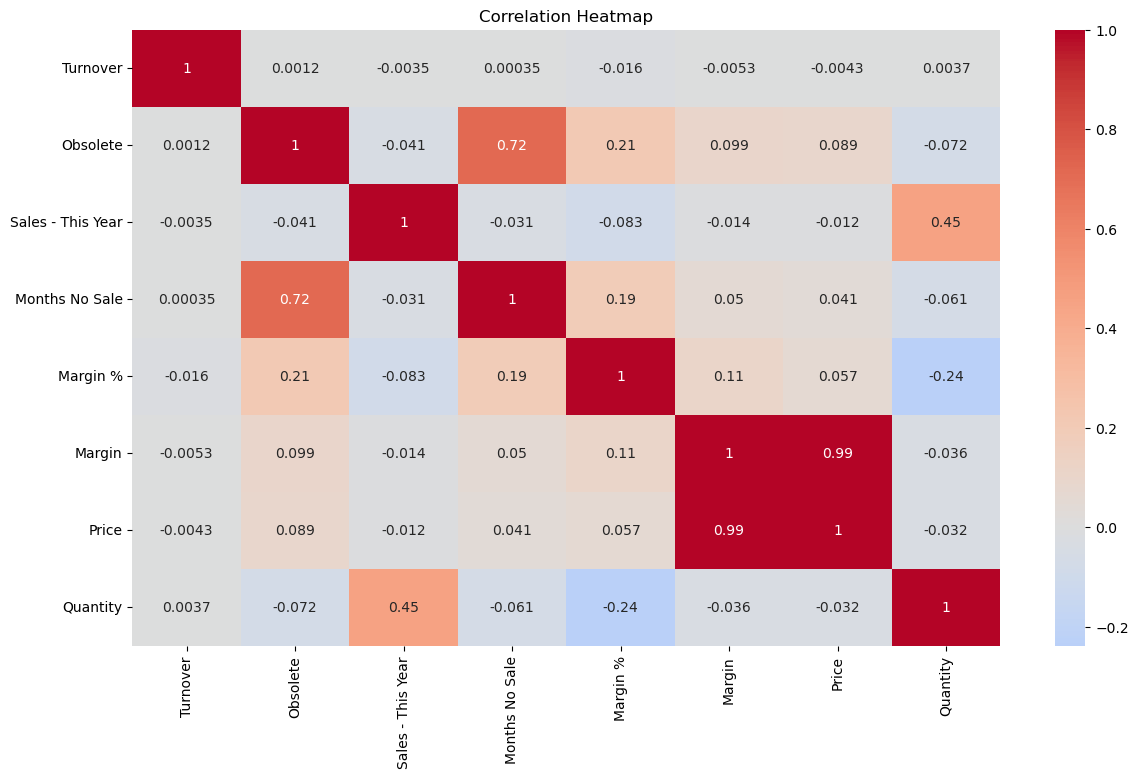

In [286]:
key_columns = ['Turnover', 'Obsolete', 'Sales - This Year',
       'Months No Sale','Margin %','Margin', 'Price', 'Quantity', ]

correlation_matrix = low_turnover[key_columns].corr()

plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [358]:
def correlation_calculator(dataframe, target_feature, mask_value):
    numerical_cols = dataframe.select_dtypes(include='number').columns
    mask = dataframe[target_feature] < mask_value

    correlation_results = {}

    correlation = parts_data[numerical_cols][mask].corr()[target_feature]

    for feature, corr in correlation.items():
        if np.isnan(corr):
            corr = 0.0
        correlation_results[feature] = corr

    return correlation_results

results = correlation_calculator(parts_data, 'Turnover', 0.000000000000001)
results.pop('Turnover')  # Remove 'Turnover' feature from the results

features = list(results.keys())
correlations = list(results.values())

In [359]:
# Create a bar plot using Plotly
fig = px.bar(
    x=features,
    y=correlations,
    title='Correlation with Turnover',
    labels={'x': 'Variable', 'y': 'Correlation'},
    template='plotly',  # You can choose a different template if you prefer
)

# Customize layout and appearance
fig.update_layout(
    xaxis_tickangle=-90,
    xaxis_title=None,
    yaxis_title='Correlation',
    height=800,  # Adjust the height as needed
)

# Show the interactive plot
fig.show()


In [352]:
results = correlation_calculator(parts_data, 'Obsolete', 0)
results.pop('Obsolete')  # Remove 'Turnover' feature from the results

features = list(results.keys())
correlations = list(results.values())

In [353]:
# Create a bar plot using Plotly
fig = px.bar(
    x=features,
    y=correlations,
    title='Correlation with Obsolecence',
    labels={'x': 'Variable', 'y': 'Correlation'},
    template='plotly',  # You can choose a different template if you prefer
)

# Customize layout and appearance
fig.update_layout(
    xaxis_tickangle=-90,
    xaxis_title=None,
    yaxis_title='Correlation',
    height=800,  # Adjust the height as needed
)

# Show the interactive plot
fig.show()